## Financially Healthy Companies:
- **Understand business relationships**: For example, `total_assets` should generally be greater than `current_assets`. `gross_profit` should be derived from `net_sales` and `cost_of_goods_sold`. These relationships should guide the generation process.
- **Introduce variability**: Randomly modify values but keep them within reasonable business ranges and relationships.

### Steps:
1. **Define Logical Relationships**:
   - `gross_profit = net_sales - cost_of_goods_sold`
   - `ebit = gross_profit - total_operating_expenses - depreciation_and_amortization`
   - `ebitda = ebit + depreciation_and_amortization`
   - `net_income = ebit - total_long_term_debt`
   - `total_liabilities` should be less than or equal to `total_assets`
   - `market_value` can depend on `net_income` or `ebitda` with some variability

2. **Data Application**: Use `numpy` for handling values while applying business rules to maintain realistic relationships.

### Key Points:
1. **Relationships between variables**: 
   - `gross_profit = net_sales - cost_of_goods_sold`
   - `ebit = gross_profit - total_operating_expenses - depreciation_and_amortization`
   - `ebitda = ebit + depreciation_and_amortization`
   - `net_income = ebit - total_long_term_debt`
2. **Ranges**: Values are defined within ranges while preserving logical relationships.
3. **Realistic Variability**: The approach ensures realistic variability, maintaining business sense.

### Outcome:
This method ensures that the financial data behaves logically, where relationships between variables like `net_sales`, `gross_profit`, `ebit`, and `total_assets` are consistent with business logic. Meaningful variations are applied to ensure that the data reflects realistic financial behavior.


In [1]:
import pandas as pd
import numpy as np


In [2]:
# import pandas as pd
# import numpy as np
# from data_generation_functions import generate_company_size, generate_company_age

# # Set the number of records to generate
# num_records = 15000
# states = [
#     "Arizona", "Connecticut", "Colorado", "California",
#     "Florida", "Delaware", "Georgia",
#     "Hawaii","Louisiana",
#     "Massachusetts", "Michigan", "Nebraska", "Nevada",
#     "North Carolina", "New York", "New Jersey", "Ohio",
#     "Oklahoma","Washington",  "South Carolina",
#     "Texas","Utah"
# ]
# industries = ['Technology', 'Healthcare', 'Finance', 'Retail', 'Manufacturing', 'Energy', 'Transportation', 
#               'Real Estate', 'Utilities', 'Telecommunications', 'Education', 'Hospitality']

# company_statuses = ['Public', 'Private']

# # Define a random seed for reproducibility
# np.random.seed(33)

# # Generate random data with adjusted business logic
# def generate_company_size(net_sales):
#     if net_sales < 15e5:
#         return np.random.randint(1, 51)  # Small
#     elif net_sales < 3e6:
#         return np.random.randint(51, 251)  # Medium
#     else:
#         return np.random.randint(251, 1001)  # Large

# def generate_company_age(size):
#     if size <= 50:  # Small
#         return np.random.randint(0, 6)  # Startup
#     elif size <= 250:  # Medium
#         return np.random.randint(6, 11)  # Growth
#     else:  # Large
#         return np.random.randint(11, 31)  # Established

# # Generate random dates for healthy companies
# def generate_random_dates(start_year, end_year, num_records):
#     start_date = pd.Timestamp(f'{start_year}-01-01')
#     end_date = pd.Timestamp(f'{end_year}-12-31')
    
#     # Generate random days within the date range
#     random_days = np.random.randint(0, (end_date - start_date).days, num_records)
    
#     # Create the random dates
#     random_dates = start_date + pd.to_timedelta(random_days, unit='D')
    
#     return random_dates

# # Generate data that represents healthy companies

# random_dates = generate_random_dates(start_year=2000, end_year=2019, num_records=num_records)

# # Assets and liabilities
# current_assets = np.random.normal(50000, 200000, num_records)
# total_assets = current_assets + np.random.normal(600000, 300000, num_records)

# # Liabilities and financial health
# total_liabilities = total_assets - np.random.normal(300000, 100000, num_records)
# total_liabilities = np.clip(total_liabilities, 50000, total_assets)  # Ensure financial health

# # Net sales with a floor to avoid zeros
# net_sales = np.random.normal(2500000, 1000000, num_records)
# net_sales = np.clip(net_sales, 1000, None)  # Minimum sales to avoid zeros

# # Other financial metrics
# gross_profit = net_sales - np.random.normal(400000, 150000, num_records)  # Gross profit
# total_operating_expenses = np.random.normal(500000, 200000, num_records)
# depreciation_and_amortization = np.random.exponential(15000, num_records)

# # EBITDA and EBIT calculations
# ebit = gross_profit - total_operating_expenses - depreciation_and_amortization
# ebitda = ebit + depreciation_and_amortization

# # Net income with a floor to avoid negative values
# net_income = np.clip(ebit - np.random.normal(300000, 100000, num_records), 0, None)

# # Current liabilities should be lower than current assets
# total_current_liabilities = np.random.normal(loc=current_assets * 0.6, scale=abs(current_assets), size=num_records)  # Around 60% of current assets

# total_long_term_debt = np.random.normal(loc=total_liabilities * 0.5, scale= abs(total_liabilities * 0.1), size=num_records)  # Manageable debt

# inventory = np.random.lognormal(mean=8, sigma=0.4, size=num_records) 
# total_receivables = np.random.normal(loc=150000, scale=50000, size=num_records)

# cost_of_goods_sold = np.random.normal(loc=400000, scale=150000, size=num_records)  # Lower COGS relative to sales

# # Market value and revenue calculations
# market_value = np.abs(net_income) * np.random.uniform(5, 15, num_records)
# total_revenue = net_sales * np.random.uniform(1.1, 1.5, num_records)
# retained_earnings = np.random.uniform(0, net_income * 0.3, num_records)

# # Generate company size using log-normal distribution
# size = np.array([generate_company_size(s) for s in net_sales])

# # Company age: exponentially distributed, older companies less frequent
# age = np.array([generate_company_age(size) for size in size])

# #industries with a Zipf distribution (skewed distribution)
# industry_probs = [0.25, 0.2, 0.15, 0.12, 0.1, 0.08, 0.05, 0.03, 0.02, 0.01, 0.02, 0.01]

# # Normalize probabilities
# industry_probs = [p / sum(industry_probs) for p in industry_probs]
# industry = np.random.choice(industries, num_records, p=industry_probs)

# # Generate states with a Dirichlet distribution (ensures probabilities sum to 1)
# state_probs = np.random.dirichlet(alpha=[1] * len(states))
# state = np.random.choice(states, num_records, p=state_probs)

# status_probs = [0.63, 0.37]
# company_status = np.random.choice(company_statuses, num_records, p=status_probs)


# # Create DataFrame
# data = {
#     'time': random_dates,
#     'industry': industry,
#     'state': state,
#     'company_status': company_status,
#     'current_assets': np.clip(current_assets, 0, None),
#     'total_assets': np.clip(total_assets, 0, None),
#     'total_liabilities': np.clip(total_liabilities, 0, None),
#     'net_sales': net_sales,
#     'gross_profit': np.clip(gross_profit, 0, None),
#     'total_operating_expenses': np.clip(total_operating_expenses, 0, None),
#     'depreciation_and_amortization': depreciation_and_amortization,
#     'ebit': np.clip(ebit, 0, None),
#     'ebitda': np.clip(ebitda, 0, None),
#     'net_income': net_income,
#     'market_value': np.clip(market_value, 0, None),
#     'retained_earnings': np.clip(retained_earnings, 0, None),
#     'total_revenue': np.clip(total_revenue, 0, None),
#     'size': size,
#     'age': age,
#     'total_current_liabilities': np.clip(total_current_liabilities, 0, None),
#     'cost_of_goods_sold': np.clip(cost_of_goods_sold, 0, None),
#     'total_long_term_debt': np.clip(total_long_term_debt, 0, None),
#     'inventory': np.clip(inventory, 0, None),
#     'total_receivables': np.clip(total_receivables, 0, None)
# }

# df_healthy = pd.DataFrame(data)

# df_healthy.head()


In [3]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import timedelta
from scipy import stats

# Set the number of unique companies
num_companies = 3000

# Random number of periods per company
min_periods = 20
max_periods = 35

# Define industries with typical gross margin ranges
industries = {
    'Technology': {'gross_margin': (0.40, 0.80)},
    'Finance': {'gross_margin': (0.50, 0.90)},
    'Healthcare': {'gross_margin': (0.30, 0.70)},
    'Retail': {'gross_margin': (0.10, 0.50)},
    'Manufacturing': {'gross_margin': (0.10, 0.60)},
    # Add more industries as needed
}

industry_list = list(industries.keys())

states = [
    'California', 'New York', 'Texas', 'Florida', 'Illinois',
    'Washington', 'Georgia', 'Pennsylvania', 'Ohio', 'North Carolina'
]
company_statuses = ['Public', 'Private']

# Generate company IDs
company_ids = np.arange(1, num_companies + 1)

# Assign attributes to companies
np.random.seed(33)  # For reproducibility of attributes

company_attributes = pd.DataFrame({
    'company_id': company_ids,
    # 'industry': np.random.choice(industry_list, size=num_companies),
    'state': np.random.choice(states, size=num_companies),
    # 'company_status': np.random.choice(company_statuses, size=num_companies),
    # 'size_category': np.random.choice(['Small', 'Medium', 'Large'], size=num_companies),
    'age': np.random.randint(1, 21, size=num_companies)  # Age between 1 and 50 years
})

def assign_size(age):
    if age < 5:
        return 'Small'
    elif age < 12:
        return np.random.choice(['Small', 'Medium'], p=[0.3, 0.7])
    else:
        return np.random.choice(['Medium', 'Large'], p=[0.4, 0.6])
company_attributes['size_category'] = company_attributes['age'].apply(assign_size)

def assign_status(size_category):
    if size_category == 'Small':
        return 'Private'
    elif size_category == 'Medium':
        return np.random.choice(['Private', 'Public'], p=[0.7, 0.3])
    else:
        return 'Public'

company_attributes['company_status'] = company_attributes['size_category'].apply(assign_status)

# Generate company names using Faker
fake = Faker()
company_names = set()
while len(company_names) < num_companies:
    company_names.add(fake.company())

company_attributes['company_name'] = list(company_names)

industry_probs = {
    'Technology': 0.2,
    'Finance': 0.15,
    'Healthcare': 0.15,
    'Retail': 0.27,
    'Manufacturing': 0.23
}
company_attributes['industry'] = np.random.choice(
    industry_list,
    size=num_companies,
    p=list(industry_probs.values())
)

# Create a list to store date data for each company
data_list = []
overall_start_date = pd.to_datetime('2000-01-01')
overall_end_date = pd.to_datetime('2018-12-31')

def generate_dates(num_periods, start_date, frequency='Q'):
    return pd.date_range(start=start_date, periods=num_periods, freq=frequency)

for idx, row in company_attributes.iterrows():
    company_id = row['company_id']
    num_periods = np.random.randint(min_periods, max_periods + 1)
    start_date = overall_start_date + timedelta(days=np.random.randint(0, (overall_end_date - overall_start_date).days - 365))
    dates = generate_dates(num_periods, start_date)


    # Create a DataFrame for this company
    df_company = pd.DataFrame({
        'company_id': [company_id] * num_periods,
        'date': dates,
        'industry': [row['industry']] * num_periods,
        'state': [row['state']] * num_periods,
        'company_status': [row['company_status']] * num_periods,
        'size_category': [row['size_category']] * num_periods,
        'age': [row['age']] * num_periods,
        'company_name': [row['company_name']] * num_periods
    })

    data_list.append(df_company)

# Combine all company DataFrames
df = pd.concat(data_list, ignore_index=True)


C:\Users\windows FSD\AppData\Local\Temp\ipykernel_13336\3694873923.py:93: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  return pd.date_range(start=start_date, periods=num_periods, freq=frequency)


In [4]:
df[df['size_category'] == 'Large'].value_counts().sum()

np.int64(23286)

In [5]:

# Function to generate financial metrics for a company over time
def generate_financials(company, distressed=False):
    # add distress label column
    company['bankrupt'] = distressed
    min_date = company['date'].min().year
    year_founded = np.random.randint(min_date - 30, min_date)  # Founded up to 30 years before the first record
    company['year_founded'] = year_founded

    num_periods = len(company)
    industry = company['industry'].iloc[0]
    size_category = company['size_category'].iloc[0]
    
    # Set base revenue ranges based on company size
    if size_category == 'Small':
        revenue_lower, revenue_upper = 50000, 500000
    elif size_category == 'Medium':
        revenue_lower, revenue_upper = 500000, 1500000
    else:  # Large companies
        revenue_lower, revenue_upper = 1500000, 5000000

    initial_revenue = np.random.uniform(revenue_lower, revenue_upper)

    # Function to get growth rate based on company size and distress condition
    def get_growth_rate(size_category, period, distressed=False):
        if distressed:
            return np.random.normal(-0.1, 0.1, period).clip(-0.1, 0.1)
        else:
            if size_category == 'Small':
                return np.random.normal(0.12, 0.08, period).clip(0.1, 0.1)
            elif size_category == 'Medium':
                return np.random.normal(0.07, 0.05, period).clip(0.15, 0.25)
            else:  # Large companies
                return np.random.normal(0.03, 0.01, period).clip(-0.1, 0.2)

    # Generate revenue growth rates
    growth_rates = get_growth_rate(size_category, num_periods, distressed=distressed)
    revenues = initial_revenue * np.cumprod(1 + growth_rates)

    # Generate gross margins based on industry
    gross_margin_lower, gross_margin_upper = industries[industry]['gross_margin']
    if distressed:
        gross_margins = np.random.normal(-0.1, 0.1, num_periods).clip(-0.5, 0.2)
    else:
        gross_margins = np.random.normal(gross_margin_lower, gross_margin_upper, num_periods)

    gross_profits = revenues * gross_margins


    # Operating expenses percentage based on industry or distress condition
    industry_expense_factors = {
        'Technology': 0.2,
        'Healthcare': 0.18,
        'Finance': 0.1,
        'Retail': 0.12,
        'Manufacturing': 0.15
    }
    if distressed:
        # Increase expense factor for distressed companies
        if industry == 'Technology':
            operating_expenses_pct = np.random.normal(0.6, 0.1, num_periods)
        elif industry == 'Retail':
            operating_expenses_pct = np.random.normal(0.5, 0.1, num_periods)
        else:
            operating_expenses_pct = np.random.normal(0.4, 0.1, num_periods)
    else:
        operating_expenses_pct = np.random.normal(industry_expense_factors[industry], 0.05, num_periods)


    total_operating_expenses = revenues * operating_expenses_pct
    depreciation_and_amortization = np.random.lognormal(mean=7, sigma=1, size=num_periods)
    ebit = gross_profits - total_operating_expenses - depreciation_and_amortization
    ebitda = ebit + depreciation_and_amortization

    # Net income margins depending on distress condition
    if distressed:
        net_income_margins = np.random.normal(-0.15, 0.1, num_periods).clip(-0.3, 0.05)
    else:
        net_income_margins = np.random.normal(0.5, 0.15, num_periods).clip(0.1, 0.8)

    net_income = revenues * net_income_margins
    total_assets = revenues * np.random.normal(0.8, 1.5, num_periods)
    total_liabilities = np.minimum(total_assets * np.random.normal(0.7, 1.0, num_periods), total_assets) if distressed else total_assets * np.random.normal(0.3, 0.6, num_periods)

    # Generating other financial metrics
    current_assets = total_assets * np.random.normal(0.4, 0.6, num_periods)
    total_current_liabilities = total_liabilities * np.random.normal(0.4, 0.6, num_periods)
    inventory = np.random.normal(5000, 50000, num_periods)
    total_receivables = revenues * np.random.normal(0.1, 0.3, num_periods)

    if distressed:
        retained_earnings = np.cumsum(net_income) * np.random.normal(-0.2, 0.5)
    else:
        retained_earnings = np.cumsum(net_income) * np.random.normal(0.5, 1.0)

    if distressed:
        market_value = net_income * np.random.normal(1, 3, num_periods).clip(0, None)
    else:
        market_value = net_income * np.random.normal(5, 15, num_periods)

    # Assign generated financials to the company dataframe
    company['total_revenue'] = revenues
    company['net_sales'] = revenues
    company['gross_profit'] = gross_profits
    company['total_operating_expenses'] = total_operating_expenses
    company['depreciation_and_amortization'] = depreciation_and_amortization
    company['ebit'] = ebit
    company['ebitda'] = ebitda
    company['net_income'] = net_income
    company['total_assets'] = total_assets
    company['total_liabilities'] = total_liabilities
    company['current_assets'] = current_assets
    company['total_current_liabilities'] = total_current_liabilities
    company['inventory'] = inventory
    company['total_receivables'] = total_receivables
    company['retained_earnings'] = retained_earnings
    company['market_value'] = market_value
    company['cost_of_goods_sold'] = revenues - gross_profits
    company['total_long_term_debt'] = total_liabilities - total_current_liabilities

    # Clip non-negative values where appropriate
    company[['total_assets', 'current_assets', 'total_liabilities', 'market_value']] = company[['total_assets', 'current_assets', 'total_liabilities', 'market_value']].clip(lower=0)

    return company


# Apply the function to each company with some companies becoming distressed over time
distressed_company_ids = np.random.choice(company_attributes['company_id'], size=int(0.15 * num_companies), replace=False)
df = df.groupby('company_id', group_keys=False).apply(lambda x: generate_financials(x, distressed=x['company_id'].iloc[0] in distressed_company_ids))

# Display the first few rows
df.head()


# Remove time component from 'date' column
df['date'] = pd.to_datetime(df['date']).dt.date

# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values
df.fillna(0, inplace=True)


# Identify outliers basnumeric_cols = df.select_dtypes(include=[np.number]).columnsdf_numeric = df[numeric_cols]quaQ1 = df_numeric.quantile(0.25)0Q3 = df_numeric.quantile(0.75)IQR = Q3 - Q1outlier_mask = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)df = df[~outlier_mask].75)
# IQR = Q3 - Q1
# outlier_mask = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
# df = df[~outlier_mask]


# Display the first few rows
df.head()


C:\Users\windows FSD\AppData\Local\Temp\ipykernel_13336\3169159774.py:128: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('company_id', group_keys=False).apply(lambda x: generate_financials(x, distressed=x['company_id'].iloc[0] in distressed_company_ids))


,company_id,date,industry,state,company_status,size_category,age,company_name,bankrupt,year_founded,...,total_assets,total_liabilities,current_assets,total_current_liabilities,inventory,total_receivables,retained_earnings,market_value,cost_of_goods_sold,total_long_term_debt
0,1,2003-06-30,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,0.000000e+00,0.000000e+00,0.000000e+00,-7.886080e+04,-35898.285742,3.973010e+05,-5.607666e+05,1.973486e+07,-1.232807e+05,-8.946426e+04
1,1,2003-09-30,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,5.071642e+06,3.141095e+06,3.009119e+06,1.470659e+06,136043.521956,2.929116e+05,-1.283968e+06,0.000000e+00,-2.955381e+04,1.670436e+06
2,1,2003-12-31,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,9.648575e+06,7.404748e+06,1.658492e+07,1.083263e+07,-4926.178232,3.816486e+05,-1.650210e+06,1.224438e+07,8.923807e+05,-3.427877e+06
3,1,2004-03-31,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,3.182382e+06,3.485788e+06,3.410696e+06,7.682512e+05,33313.676040,-3.189751e+04,-1.995534e+06,1.964896e+07,2.340995e+06,2.717537e+06
4,1,2004-06-30,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.149240e+05,18708.587100,2.014416e+06,-2.706888e+06,0.000000e+00,2.210840e+06,-1.299979e+06


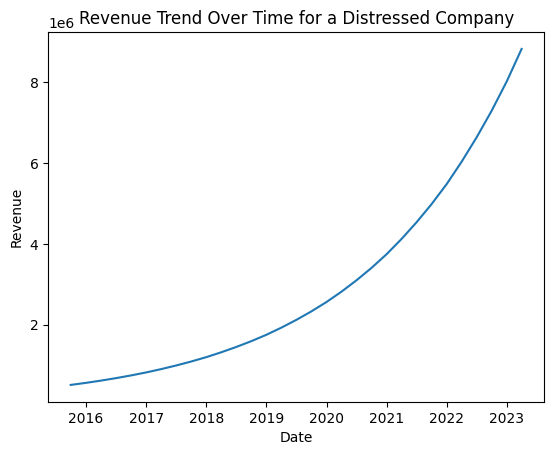

In [6]:
# Example: Plot revenue over time for a sample of distressed and non-distressed companies
import matplotlib.pyplot as plt

sample_company = df[df['company_id'] == np.random.choice(df['company_id'])].copy()
plt.plot(sample_company['date'], sample_company['total_revenue'], label='Distressed Company')
plt.title('Revenue Trend Over Time for a Distressed Company')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


In [7]:
df.shape[0]


82498

In [8]:
df[df['gross_profit'] <1000000].value_counts().sum()   


np.int64(54868)

In [9]:
df[df['net_sales'] <100000].value_counts().sum()

np.int64(2209)

In [10]:
df[(df['net_sales'] >=200000) & (df['net_sales'] <500000)].value_counts().sum()

np.int64(7663)

In [11]:
df_healthy = df.copy()  

,company_id,date,industry,state,company_status,size_category,age,company_name,bankrupt,year_founded,...,total_assets,total_liabilities,current_assets,total_current_liabilities,inventory,total_receivables,retained_earnings,market_value,cost_of_goods_sold,total_long_term_debt
0,1,2003-06-30,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,0.000000e+00,0.000000e+00,0.000000e+00,-7.886080e+04,-35898.285742,3.973010e+05,-5.607666e+05,1.973486e+07,-1.232807e+05,-8.946426e+04
1,1,2003-09-30,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,5.071642e+06,3.141095e+06,3.009119e+06,1.470659e+06,136043.521956,2.929116e+05,-1.283968e+06,0.000000e+00,-2.955381e+04,1.670436e+06
2,1,2003-12-31,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,9.648575e+06,7.404748e+06,1.658492e+07,1.083263e+07,-4926.178232,3.816486e+05,-1.650210e+06,1.224438e+07,8.923807e+05,-3.427877e+06
3,1,2004-03-31,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,3.182382e+06,3.485788e+06,3.410696e+06,7.682512e+05,33313.676040,-3.189751e+04,-1.995534e+06,1.964896e+07,2.340995e+06,2.717537e+06
4,1,2004-06-30,Healthcare,Illinois,Public,Large,14,"Blair, Reynolds and Phillips",False,1994,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.149240e+05,18708.587100,2.014416e+06,-2.706888e+06,0.000000e+00,2.210840e+06,-1.299979e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82493,3000,2015-06-30,Healthcare,Texas,Private,Medium,6,Mitchell-Ferguson,False,1998,...,3.343826e+07,3.596054e+06,0.000000e+00,9.163938e+05,-21833.029144,1.859421e+07,1.663074e+07,7.213990e+08,3.493115e+07,2.679660e+06
82494,3000,2015-09-30,Healthcare,Texas,Private,Medium,6,Mitchell-Ferguson,False,1998,...,8.349146e+06,2.856907e+06,0.000000e+00,-4.920472e+05,-35664.084809,7.762960e+06,1.901135e+07,1.305871e+08,-9.935105e+06,3.348954e+06
82495,3000,2015-12-31,Healthcare,Texas,Private,Medium,6,Mitchell-Ferguson,False,1998,...,4.857425e+07,0.000000e+00,4.424774e+07,-4.605219e+04,-22615.918198,2.043502e+07,2.136752e+07,1.109837e+08,1.859458e+07,-1.282955e+05
82496,3000,2016-03-31,Healthcare,Texas,Private,Medium,6,Mitchell-Ferguson,False,1998,...,0.000000e+00,0.000000e+00,1.134153e+07,-6.588660e+06,17998.229054,-2.301673e+06,2.438555e+07,0.000000e+00,1.598790e+07,-5.019494e+06


In [12]:
# Identify companies with net_sales over 2,000,000
companies_to_remove = df_healthy[df_healthy['net_sales'] > 2000000]['company_id'].unique()

# Remove these companies from the DataFrame
df_healthy = df_healthy[~df_healthy['company_id'].isin(companies_to_remove)].reset_index(drop=True)

C:\Users\windows FSD\AppData\Local\Temp\ipykernel_13336\183219230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts[0], y=state_counts[1], palette="viridis")


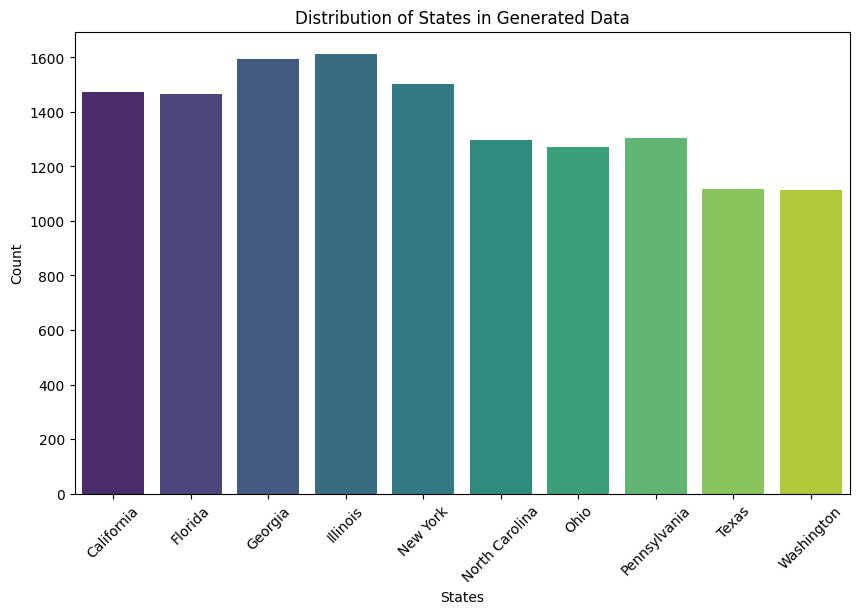

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

state = df_healthy["state"]

state_counts = np.unique(state, return_counts=True)

# Create a bar plot for state distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts[0], y=state_counts[1], palette="viridis")
plt.title("Distribution of States in Generated Data")
plt.xlabel("States")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
